In [1]:
#Chn2Pyr testing

In [2]:
import numpy as np
from neuron import h
import os
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
from scipy.signal import find_peaks

In [3]:
#do not rerun
h.load_file('stdrun.hoc')
#h.nrn_load_dll(os.path.join("biophys_components","mechanisms","modfiles","nrnmech.dll"))
h.nrn_load_dll(os.path.join("biophys_components","mechanisms","modfiles","x86_64",".libs","libnrnmech.so"))
#fileList = ['class_pyramidalcell_original_modified.hoc','class_axoaxoniccell.hoc']
#fileList = ['class_pyramidalcell.hoc','class_axoaxoniccell.hoc']
fileList = ['class_pyramidalcell.hoc']
#for each file, load it into the hoc interpreter so it can be accessed
for item in fileList:
    h.load_file(os.path.join("biophys_components/templates/",item))
callNames = ["h." + fileList[i].split('_')[1].split('.')[0] + "()" for i in range(len(fileList))]
callNames.sort()
for i in range(len(callNames)):
    myCell = eval(callNames[i])
    for sec in h.allsec(myCell):
        print(sec)

pyramidalcell[0].soma[0]
pyramidalcell[0].apical[0]
pyramidalcell[0].apical[1]
pyramidalcell[0].apical[2]
pyramidalcell[0].apical[3]
pyramidalcell[0].apical[4]
pyramidalcell[0].apical[5]
pyramidalcell[0].apical[6]
pyramidalcell[0].apical[7]
pyramidalcell[0].apical[8]
pyramidalcell[0].basal[0]
pyramidalcell[0].basal[1]
pyramidalcell[0].basal[2]
pyramidalcell[0].basal[3]
pyramidalcell[0].axon[0]
pyramidalcell[0].axon[1]
pyramidalcell[0].axon[2]
pyramidalcell[0].axon[3]
pyramidalcell[0].axon[4]
pyramidalcell[0].axon[5]
pyramidalcell[0].axon[6]
pyramidalcell[0].axon[7]
pyramidalcell[0].axon[8]
pyramidalcell[0].axon[9]
pyramidalcell[0].axon[10]
pyramidalcell[0].axon[11]


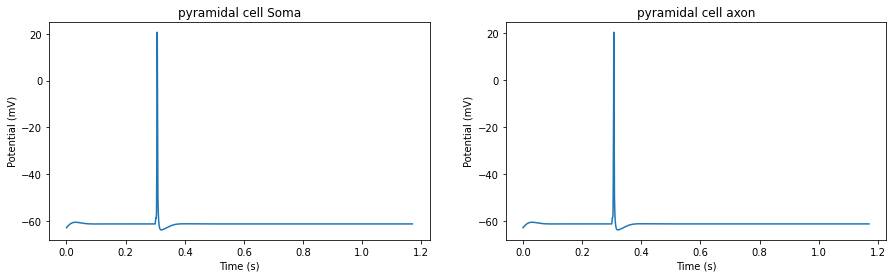

"\nfig,axs = plt.subplots(1,2,figsize=(15,4))\nplt.subplots_adjust(hspace=0.5)\nstart,k = 0,0\nfor j in range(2):\n    axs[j].plot(time[:5850],res[:5850,start:start+len(InjList[k])])\n    axs[j].set_title(callNames[k].split('.')[1].split('()')[0])\n    axs[j].set_xlabel('Time (s)')\n    axs[j].set_ylabel('Potential (mV)')\n    start += len(InjList[k])\n\n    k+=1\n"

In [31]:

AxonNo = 5
#InjList = [np.arange(400,500,50),#aac
#           np.arange(200,550,50)]#pyr
a = 90
InjList = [np.array([a]),np.array([a])]
allTrials = []
allTrialsVas = []
allTrialsiNasoma = []
for i in range(len(callNames)):
    myCell = eval(callNames[i])#make the cell
    Ia = InjList[i] /1000# nA ->pA# the current sweep for this particular cell
    allVs = []
    allVas = []
    alliNasoma = []
    for j in range(len(Ia)):#test it at each current injection and save       
        iclamp = h.IClamp(myCell.axon[AxonNo](0.5))
        iclamp.delay = 300
        iclamp.dur = 2
        iclamp.amp = Ia[j]
        
        v = h.Vector().record(myCell.soma[0](0.5)._ref_v)
        va = h.Vector().record(myCell.axon[0](0.5)._ref_v)
        iNasoma = h.Vector().record(myCell.soma[0](0.5)._ref_ina)
        
        h.dt=0.2
        h.finitialize(-63)
        h.continuerun(1500)
        
        iNaSoma = np.array(iNasoma)
        V = np.array(v)
        Va = np.array(va)
        
        
        allVs.append(V)
        allVas.append(Va)
        alliNasoma.append(iNasoma)
        
    allTrials.append([allVs])#list of lists; each sublist has the current sweeps for the given cell
    allTrialsVas.append([allVas])
    allTrialsiNasoma.append([alliNasoma])
    
res = np.concatenate(allTrials,axis=1)[0].T#how I plotted it the first time.
resVa = np.concatenate(allTrialsVas,axis=1)[0].T#how I plotted it the first time.
resIna =  np.concatenate(allTrialsiNasoma,axis=1)[0].T#how I plotted it the first time.

time = np.arange(0,res.shape[0]*h.dt/1000,h.dt/1000)#time in seconds

start = 0

fig,axs = plt.subplots(1,2,figsize=(15,4))
axs[0].plot(time[:5850],res[:5850,start:start+len(InjList[1])])
axs[0].set_title('pyramidal cell Soma')
axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel('Potential (mV)')

axs[1].plot(time[:5850],resVa[:5850,start:start+len(InjList[1])])
axs[1].set_title('pyramidal cell axon')
axs[1].set_xlabel('Time (s)')
axs[1].set_ylabel('Potential (mV)')


plt.show()


"""
fig,axs = plt.subplots(1,2,figsize=(15,4))
plt.subplots_adjust(hspace=0.5)
start,k = 0,0
for j in range(2):
    axs[j].plot(time[:5850],res[:5850,start:start+len(InjList[k])])
    axs[j].set_title(callNames[k].split('.')[1].split('()')[0])
    axs[j].set_xlabel('Time (s)')
    axs[j].set_ylabel('Potential (mV)')
    start += len(InjList[k])

    k+=1
"""
#plt.savefig('current sweeps.png',dpi=500)

Text(0, 0.5, 'current pA')

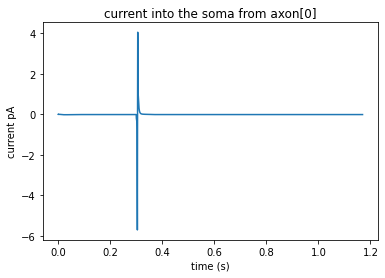

In [5]:
plt.plot(time[:5850],((np.array(v) - np.array(va))/myCell.soma[0](1).ri())[:5850])
plt.title('current into the soma from axon[0]')
plt.xlabel('time (s)')
plt.ylabel('current pA')

Text(0, 0.5, 'current (pA)')

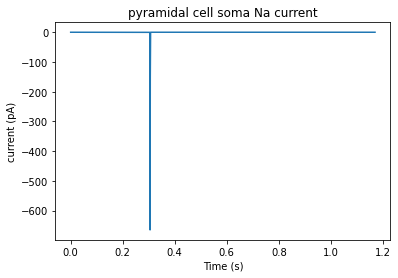

In [6]:
plt.plot(time[:5850],resIna[:5850,:0+len(InjList[1])]*1000)
plt.title('pyramidal cell soma Na current')
plt.xlabel('Time (s)')
plt.ylabel('current (pA)')

In [7]:
h.topology()


|-|       pyramidalcell[1].soma[0](0-1)
   `--|       pyramidalcell[1].apical[0](0-1)
       `----|       pyramidalcell[1].apical[1](0-1)
             `--------|       pyramidalcell[1].apical[2](0-1)
                       `----|       pyramidalcell[1].apical[3](0-1)
                             `----|       pyramidalcell[1].apical[4](0-1)
                                   `--|       pyramidalcell[1].apical[5](0-1)
                       `----|       pyramidalcell[1].apical[6](0-1)
                             `----|       pyramidalcell[1].apical[7](0-1)
                                   `--|       pyramidalcell[1].apical[8](0-1)
 `----|       pyramidalcell[1].basal[0](0-1)
       `----------|       pyramidalcell[1].basal[1](0-1)
 `----|       pyramidalcell[1].basal[2](0-1)
       `----------|       pyramidalcell[1].basal[3](0-1)
 `|       pyramidalcell[1].axon[0](0-1)
   `|       pyramidalcell[1].axon[1](0-1)
     `|       pyramidalcell[1].axon[2](0-1)
       `|       pyramidalcell

1.0

In [8]:
myCell.soma[0].children()

[pyramidalcell[1].axon[0],
 pyramidalcell[1].basal[2],
 pyramidalcell[1].basal[0],
 pyramidalcell[1].apical[0]]

In [9]:
myCell.axon[0].psection()

{'point_processes': {},
 'density_mechs': {'pas': {'g': [3.571428571428572e-05],
   'e': [-63.0],
   'i': [5.814714448106123e-05]},
  'kv': {'gbar': [200.0],
   'gk': [0.3395237681096588],
   'ninf': [0.0006791091283294877],
   'ntau': [0.666490399954209],
   'n': [0.0006791091265102143]},
  'na16': {'gbar': [2880.0],
   'gna': [0.5595830695140698],
   'minf': [0.08761591077477392],
   'hinf': [0.1155639862945035],
   'mtau': [0.03842311534331126],
   'htau': [0.27777777777775225],
   'm': [0.08761591076344728],
   'h': [0.11556398778691394]}},
 'ions': {'na': {'ena': [50.0],
   'nai': [10.0],
   'nao': [140.0],
   'ina': [-0.006232181844250856],
   'dina_dv_': [5.595830695082765e-05]},
  'k': {'ek': [-77.0],
   'ki': [54.4],
   'ko': [2.5],
   'ik': [0.000530611820630797],
   'dik_dv_': [3.3952376810855375e-05]}},
 'morphology': {'L': 10.000000953674316,
  'diam': [3.5300000877380286],
  'pts3d': [(0.0, 0.0, 0.0, 6.0),
   (-2.0, 0.0, 0.0, 5.0),
   (-4.000000953674316, 0.0, 0.0, 4.0),


In [10]:
#AAC = eval(callNames[0])
Pyr = h.pyramidalcell()


In [11]:
for item in Pyr.axon[0].allseg():
    print(item)

pyramidalcell[2].axon[0](0)
pyramidalcell[2].axon[0](0.5)
pyramidalcell[2].axon[0](1)


In [12]:
channelDict = Pyr.axon[0].psection()

In [13]:
channelDict['ions']['na']

{'ena': [50.0], 'nai': [10.0], 'nao': [140.0], 'ina': [0.0], 'dina_dv_': [0.0]}

In [14]:
channelDict

{'point_processes': {},
 'density_mechs': {'pas': {'g': [3.571428571428572e-05],
   'e': [-63.0],
   'i': [0.0]},
  'kv': {'gbar': [200.0],
   'gk': [0.0],
   'ninf': [0.0],
   'ntau': [0.0],
   'n': [0.0]},
  'na16': {'gbar': [2880.0],
   'gna': [0.0],
   'minf': [0.0],
   'hinf': [0.0],
   'mtau': [0.0],
   'htau': [0.0],
   'm': [0.0],
   'h': [0.0]}},
 'ions': {'na': {'ena': [50.0],
   'nai': [10.0],
   'nao': [140.0],
   'ina': [0.0],
   'dina_dv_': [0.0]},
  'k': {'ek': [-77.0],
   'ki': [54.4],
   'ko': [2.5],
   'ik': [0.0],
   'dik_dv_': [0.0]}},
 'morphology': {'L': 10.000000953674316,
  'diam': [3.5300000877380286],
  'pts3d': [(0.0, 0.0, 0.0, 6.0),
   (-2.0, 0.0, 0.0, 5.0),
   (-4.000000953674316, 0.0, 0.0, 4.0),
   (-6.000000953674316, 0.0, 0.0, 3.0),
   (-8.000000953674316, 0.0, 0.0, 2.0),
   (-10.000000953674316, 0.0, 0.0, 1.2999999523162842)],
  'parent': pyramidalcell[2].soma[0](0),
  'trueparent': None},
 'nseg': 1,
 'Ra': 50.0,
 'cm': [1.0],
 'regions': set(),
 'spec

In [15]:
h.psection(sec = Pyr.axon[7])

pyramidalcell[2].axon[7] { nseg=1  L=5  Ra=50
	pyramidalcell[2].axon[6] connect pyramidalcell[2].axon[7] (0), 1
	/* First segment only */
	insert morphology { diam=1}
	insert capacitance { cm=1}
	insert pas { g_pas=3.57143e-05 e_pas=-63}
	insert na16 { gbar_na16=1645.71}
	insert na_ion { ena=50}
	insert kv { gbar_kv=900}
	insert k_ion { ek=-77}
}


1.0

In [16]:
h.psection(sec = Pyr.soma[0])

pyramidalcell[2].soma[0] { nseg=1  L=10  Ra=150
	/*location 0 attached to cell 1*/
	/* First segment only */
	insert morphology { diam=10}
	insert capacitance { cm=1}
	insert ch_HCNp { e_ch_HCNp=-30 gmax_ch_HCNp=0.0006 vhalfl_ch_HCNp=-82}
	insert ch_Navp { gmax_ch_Navp=0.032 ar2_ch_Navp=1 e_ch_Navp=0}
	insert na_ion { ena=55}
	insert ch_Kdrp { e_ch_Kdrp=0 gmax_ch_Kdrp=0.003}
	insert ch_KvAproxp { gmax_ch_KvAproxp=0.008 e_ch_KvAproxp=0}
	insert k_ion { ek=-90}
	insert pas { g_pas=3.57143e-05 e_pas=-63}
}


1.0

In [17]:
#using a synapse

In [18]:
Pyr.axon[0](1).ri()

0.7625446052493192

In [19]:
Pyr.soma[0](1).ri()

0.09549296585513721